In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.shape
num_pixels = test.shape[1]
num_pixels

784

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
import random

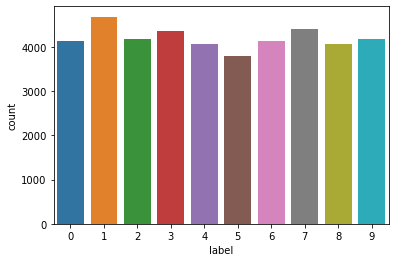

In [11]:
sns.countplot(train['label'])

In [13]:
x_train = train.drop(['label'],axis = 1)
x_test = test
x_train.head()
        
  

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
np.array(x_train)
print(x_train.shape)
print(x_test.shape)
#already flattened

(42000, 784)
(28000, 784)


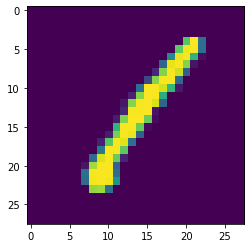

In [15]:
# lets visualize the 1st image
temp = np.array(x_train) # transformin datafraem to np array
temp = temp[0]   # taking the 1st image
temp = temp.reshape(28,28)   # reshaping the flattened image to 28*28 pixels
temp
plt.imshow(temp)

In [16]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255
type(x_train)

pandas.core.frame.DataFrame

In [17]:
y_train = train['label']
y_train = np.array(y_train)
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [18]:
x_train = np.array(x_train)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
from keras.utils import to_categorical
y_train  = to_categorical(y_train)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [20]:
print(y_train.shape)

(42000, 10)


In [21]:
num_classes = y_train.shape[1]
num_classes

10

#  Build a Conventional Neural Network

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train,test_size = 0.33,random_state = 42)

In [71]:
def classification_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=num_pixels))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [72]:
model = classification_model()

# fit the model
model.fit(xtrain, ytrain,validation_data = (xtest,ytest), epochs=10, verbose=2)

Epoch 1/10
880/880 - 2s - loss: 0.3267 - accuracy: 0.9065 - val_loss: 0.1683 - val_accuracy: 0.9503
Epoch 2/10
880/880 - 2s - loss: 0.1362 - accuracy: 0.9589 - val_loss: 0.1523 - val_accuracy: 0.9526
Epoch 3/10
880/880 - 2s - loss: 0.0918 - accuracy: 0.9723 - val_loss: 0.1223 - val_accuracy: 0.9641
Epoch 4/10
880/880 - 2s - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.1192 - val_accuracy: 0.9651
Epoch 5/10
880/880 - 2s - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.1057 - val_accuracy: 0.9692
Epoch 6/10
880/880 - 2s - loss: 0.0414 - accuracy: 0.9860 - val_loss: 0.1184 - val_accuracy: 0.9680
Epoch 7/10
880/880 - 2s - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.1264 - val_accuracy: 0.9677
Epoch 8/10
880/880 - 2s - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.1137 - val_accuracy: 0.9683
Epoch 9/10
880/880 - 2s - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.1229 - val_accuracy: 0.9685
Epoch 10/10
880/880 - 2s - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.1481 - val_accuracy: 0.9644

## Validation Accuracy upto 96.5% 
Can we increase the accuracy more?
-> CNN 

In [55]:
y_pred = model.predict(xtest)
#from sklearn.metrics import confusion_matrix
#confusion_matrix(ytest,y_pred)
y_pred

array([[2.3686968e-07, 4.2489074e-07, 3.8228100e-06, ..., 3.3037361e-07,
        9.9999297e-01, 2.0217774e-06],
       [1.1944411e-08, 9.9565828e-01, 1.4243733e-05, ..., 3.8798784e-03,
        2.7806917e-04, 2.7292015e-07],
       [2.9265347e-11, 8.3589221e-12, 7.7471709e-15, ..., 2.3623170e-07,
        4.4744611e-06, 9.9999487e-01],
       ...,
       [1.9729256e-08, 7.5721069e-15, 1.0135074e-10, ..., 4.2182942e-14,
        1.0944158e-09, 7.0639297e-12],
       [1.1017929e-11, 9.4023432e-07, 2.1478718e-07, ..., 6.9170494e-07,
        9.9195427e-07, 1.1445058e-04],
       [1.2092723e-13, 1.0368773e-10, 1.0000000e+00, ..., 3.3172652e-11,
        8.0434041e-11, 5.5938077e-16]], dtype=float32)

In [56]:
ytest

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([8, 1, 9, ..., 6, 3, 2])

In [58]:
sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
sample_sub

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [59]:
y_pred.shape

(13860,)

In [60]:
submission = pd.DataFrame({'ImageId':range(1,y_pred.shape[0]+1),'Label':y_pred})
submission

,ImageId,Label
0,1,8
1,2,1
2,3,9
3,4,9
4,5,8
...,...,...
13855,13856,3
13856,13857,9
13857,13858,6
13858,13859,3


In [61]:
import os
os.chdir(r'../working')
submission.to_csv(r'submission.csv',index = False)
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv

# Basic CNN Model

In [62]:
from keras import layers

In [63]:
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(42000, 784)
(42000, 10)


In [64]:
print(x_test.shape)

(28000, 784)


In [65]:
x_test = np.array(x_test)
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [74]:
Y_train  = y_train

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(X_train,Y_train,test_size = 0.33,random_state = 42)

In [75]:
keras.backend.clear_session()
def CNN_classification():
    model = Sequential()
    # add the first convolution layer
    model.add(layers.Convolution2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
    # add the first pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    # add regularization
    model.add(layers.Dropout(0.3))
    # add the second convolution layer
    model.add(layers.Convolution2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
    # add the second pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    # add regularization
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    # add the first fully-connected-layer
    model.add(layers.Dense(units = 128, activation = 'relu'))
    # add the second fully-connected-layer
    model.add(layers.Dense(units = 128, activation = 'relu'))
    # add the output layer 
    model.add(layers.Dense(units = 10, activation = 'softmax'))
    # compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
    return model


In [76]:
cnn_model = CNN_classification()
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [78]:
cnn_model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 10,batch_size = 64,callbacks = [earlystop])

Epoch 1/10
440/440 [==============================] - 10s 22ms/step - loss: 0.5216 - accuracy: 0.8296 - val_loss: 0.1435 - val_accuracy: 0.9566
Epoch 2/10
440/440 [==============================] - 9s 21ms/step - loss: 0.1733 - accuracy: 0.9448 - val_loss: 0.1131 - val_accuracy: 0.9641
Epoch 3/10
440/440 [==============================] - 9s 20ms/step - loss: 0.1303 - accuracy: 0.9580 - val_loss: 0.0723 - val_accuracy: 0.9779
Epoch 4/10
440/440 [==============================] - 9s 20ms/step - loss: 0.1078 - accuracy: 0.9655 - val_loss: 0.0768 - val_accuracy: 0.9742
Epoch 5/10
440/440 [==============================] - 9s 21ms/step - loss: 0.0932 - accuracy: 0.9708 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 6/10
440/440 [==============================] - 9s 20ms/step - loss: 0.0854 - accuracy: 0.9726 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 7/10
440/440 [==============================] - 9s 21ms/step - loss: 0.0755 - accuracy: 0.9761 - val_loss: 0.0487 - val_accuracy: 0.984

## Boom!! Accuracy increases to 98.64% with CNN

In [ ]:
y_test = cnn_model.predict(X_test)
y_test

In [ ]:
Y_pred = np.argmax(y_test,axis = 1)

In [ ]:
Y_pred

In [ ]:
cnn_submission = pd.DataFrame({'ImageId':range(1,Y_pred.shape[0]+1),'Label':Y_pred})
cnn_submission

In [ ]:
import os
os.chdir(r'../working')
cnn_submission.to_csv(r'cnn_submission.csv',index = False)
from IPython.display import FileLink
FileLink(r'cnn_submission.csv')

In [ ]:
cnn_model.summary()

# **Train Test Split in the training data only!!**

In [ ]:
print(y_train.shape)

In [ ]:

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
X_tr = X_tr.reshape(X_tr.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
new_model = CNN_classification()

In [ ]:
print(X_tr.shape)
print(y_tr.shape)

In [ ]:
# define early stopping
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# fit the model and save the information in history
history = new_model.fit(
    X_tr,
    y_tr,
    batch_size = 64,
    epochs = 3,
    validation_data = (X_val, y_val),
    callbacks = [earlystop])

In [ ]:
print(X_val.shape)
print(y_val.shape)

In [ ]:
results = new_model.evaluate(X_val, y_val, batch_size=64)
print(f"valid loss: {results[0]}, valid acc: {round(results[1]*100,2)}%")

In [ ]:
# get probabilities
probabilities = new_model.predict(X_val)

# get the prediction class
y_pred = np.argmax(probabilities, axis=1)

In [ ]:
# pick random data
idx = np.random.randint(0, X_val.shape[0], 32)

fig, ax = plt.subplots(4, 8, figsize=(18,12))
k = 0
for i in range(4):
    for j in range(8):
        x = X_val[idx[k]]
        y = np.argmax(y_val[idx[k]])
        ypred = y_pred[idx[k]]
        ax[i,j].imshow(x.reshape(28,28), cmap = plt.cm.binary)
        ax[i,j].set_title(f'pred:{ypred} ---- truth:{y}')
        k += 1    
plt.tight_layout()